## Test 1

EasyGeppy is based on Geppy project (https://github.com/ShuhuaGao/geppy)

This example is based on the Geppy example: https://github.com/ShuhuaGao/geppy/blob/master/examples/sr/numerical_expression_inference-ENC.ipynb

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from easy_geppy import EasyGeppy

## Synthetic dataset

In [2]:
def f(x):
    """ Ground truth function"""
    return -2 * x ** 2 + 11 * x + 13

### Generate samples

In [3]:
n_cases = 100
X = np.random.uniform(-10, 10, size=n_cases)   # random numbers in range [-10, 10)
Y = f(X) + (np.random.normal(size=n_cases)*10) # Gaussian noise

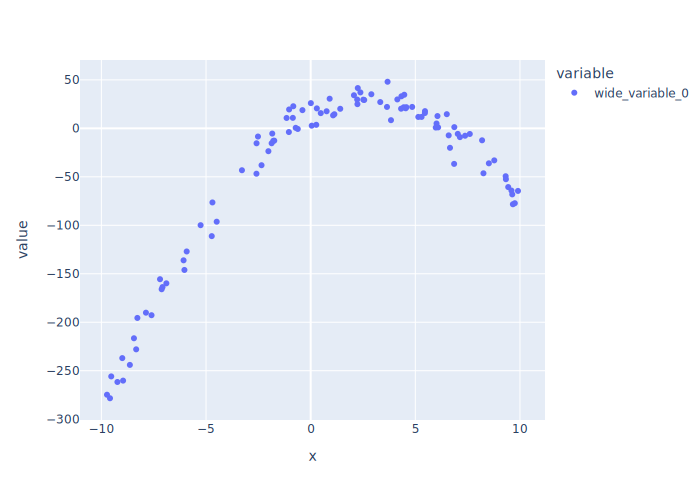

In [4]:
fig = px.scatter(x=X, y=[Y])
fig.show('svg')

### Increased noise observations

In [5]:
df = pd.DataFrame(X, columns=['x'])
df['y'] = Y
df['y1'] = Y+(np.random.normal(size=n_cases)*5)
df['y2'] = Y+(np.random.normal(size=n_cases)*10)
df['y3'] = Y+(np.random.normal(size=n_cases)*25)
df['y4'] = Y+(np.random.normal(size=n_cases)*50)
df

,x,y,y1,y2,y3,y4
0,-0.616244,-0.641945,4.891293,-0.923173,35.601678,-7.852117
1,0.266881,3.645723,4.016486,-19.657056,2.455013,-28.137008
2,-9.528698,-255.877463,-260.504993,-270.211976,-296.209204,-352.679471
3,8.514385,-36.073473,-37.883496,-50.542949,-49.147798,-13.640144
4,-6.895328,-159.875213,-163.001587,-183.630892,-206.072787,-177.538017
...,...,...,...,...,...,...
95,-4.726079,-111.173219,-107.186589,-140.694932,-179.302547,-35.805730
96,-2.019787,-23.568382,-15.720208,-28.803716,5.948266,-14.906482
97,5.142210,11.755626,10.047070,15.008597,-7.233014,114.154525
98,2.376611,37.066822,37.050188,33.716275,42.560975,-44.143946


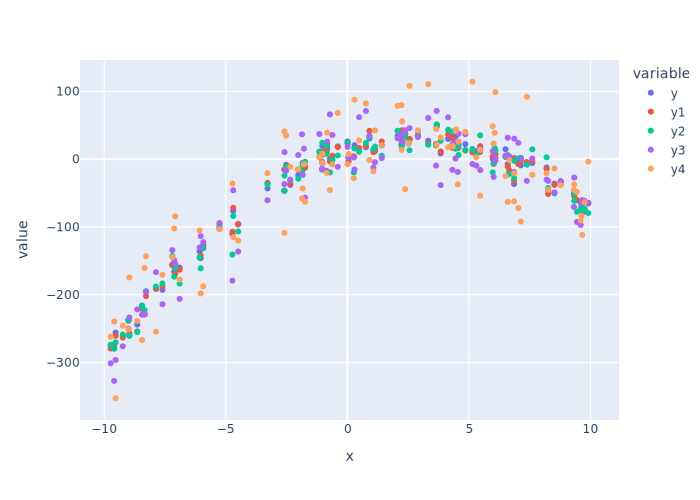

In [6]:
fig = px.scatter(df,x='x',y=['y','y1','y2','y3','y4'])
fig.show('svg')

## Define inputs and outputs

### Choose one output column

In [7]:
y_column = 'y4' # y4 is the most noisy so we're taking it

### You may choose many columns as input (remember to drop the y_column)

In [8]:
x_inputs = list(df.drop(y_column,axis=1).columns)
x_inputs

['x', 'y', 'y1', 'y2', 'y3']

### But we will use only the 'x' column from the dataset for this example

In [9]:
x_inputs = ['x']

## Create EasyGeppy instance and Initialize

In [10]:
egp = EasyGeppy(df,
                 x_columns=x_inputs,
                 y_column=y_column)

### Set default initialization

In [11]:
egp.default_initialization()
egp.metric

<function easy_geppy.easy_geppy.get_default_metric.<locals>.SSE(Y_actual, Y_Predicted)>

## Run evolution loop

In [12]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg        	std        	min   	max        
0  	100   	100 	7.29402e+33	7.14027e+34	851005	7.17648e+35
1  	99    	100 	8.94208e+23	8.8147e+24 	851005	8.85956e+25
2  	99    	100 	1.99362e+35	1.98363e+36	675497	1.99362e+37
3  	99    	100 	5.57594e+20	5.54799e+21	675497	5.57594e+22
4  	99    	100 	3.11072e+20	2.893e+21  	675497	2.9022e+22 
5  	99    	100 	1.55017e+23	1.50181e+24	675497	1.50926e+25
6  	99    	100 	3.23676e+22	2.86134e+23	590378	2.8622e+24 
7  	99    	100 	6.11646e+27	6.08104e+28	590378	6.11172e+29
8  	99    	100 	7.11984e+23	3.20991e+24	590378	2.29692e+25
9  	99    	100 	7.15857e+28	6.97194e+29	567101	7.00696e+30
10 	99    	100 	1.1882e+37 	1.18224e+38	567100	1.1882e+39 
11 	99    	100 	1.90278e+25	1.58255e+26	415965	1.55572e+27
12 	99    	100 	1.31216e+23	1.17454e+24	415965	1.17973e+25
13 	99    	100 	1.55901e+26	1.39559e+27	415965	1.40094e+28
14 	99    	100 	6.43764e+27	6.40235e+28	340198	6.43463e+29
15 	99    	100 	4.94469e+27	4.82995e+28	340198	4.85442e+

## Evolution Logs

### By default it presents statistics for the population SSE (Sums of Squares for Error) metric taken

In [13]:
egp.log[:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 7.294023886136472e+33,
  'std': 7.140273351907304e+34,
  'min': 851004.5814105918,
  'max': 7.17648043904657e+35},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 8.94208009582833e+23,
  'std': 8.814695939533907e+24,
  'min': 851004.5814105918,
  'max': 8.85955704600926e+25},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 1.9936230603569955e+35,
  'std': 1.983629899381243e+36,
  'min': 675496.7696517917,
  'max': 1.9936230603569745e+37},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 5.5759372504208284e+20,
  'std': 5.547987305846754e+21,
  'min': 675496.7696517917,
  'max': 5.575937043048729e+22},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 3.110718955773784e+20,
  'std': 2.89300374100069e+21,
  'min': 675496.7696517917,
  'max': 2.9021984135765337e+22}]

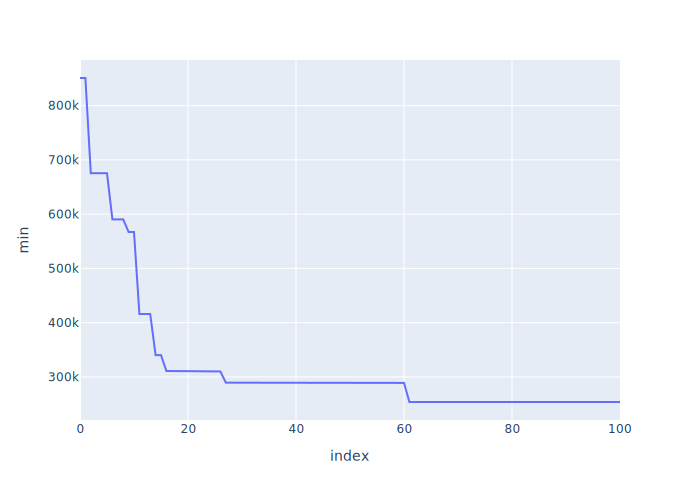

In [14]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

## Accessing Solutions

### Access an individual by index straight from the population array

In [15]:
egp.pop[1]

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [sub, x, mul, x, add, x, x, x, -57681.92667206436, 29345.376513904714, x, -34332.40889413404, 51805.062751871395, 261182.00702419007, x],
	<class 'geppy.core.entity.Gene'> [add, x, x, x, sub, mul, x, 68027.95336627719, 80914.78702436404, x, x, -130645.70744317656, x, 223532.68871228647, x]
], linker=<built-in function add>

### Get an individual simplified/symbolic description according to its index on population array

In [16]:
# symbolic representation for the individual in the Nth position of population array
n = 0
egp.get_individual_simplified(n)

x*(8.21369651948822 - 1.99997297955306*x)

### Access best indivdual (solution) from population array

In [17]:
egp.best_individual

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [sub, x, mul, x, add, x, x, x, -57681.92667206436, 29345.376513904714, 4508.402424356092, -34332.40889413404, 51805.062751871395, x, x],
	<class 'geppy.core.entity.Gene'> [protected_div, sub, protected_div, -11105.793451237947, add, -37009.01033723397, x, x, 255865.97560817032, x, x, x, x, -83744.05085591058, x]
], linker=<built-in function add>

### Get best individual simplified/symbolic description

In [18]:
egp.get_best_solution_simplified()

x*(8.21369651948822 - 1.99997297955306*x)

## Making predictions

### Get the solution as a Python function (Geppy converts the individual to a lambda function)

In [19]:
best_func = egp.get_best_solution_as_function()
best_func

<function easy_geppy.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

### Attaching predictions to dataframe

In [20]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,-0.616244,-0.641945,4.891293,-0.923173,35.601678,-7.852117,-5.821145
1,0.266881,3.645723,4.016486,-19.657056,2.455013,-28.137008,2.049629
2,-9.528698,-255.877463,-260.504993,-270.211976,-296.209204,-352.679471,-259.855543
3,8.514385,-36.073473,-37.883496,-50.542949,-49.147798,-13.640144,-75.052974
4,-6.895328,-159.875213,-163.001587,-183.630892,-206.072787,-177.538017,-151.725951
...,...,...,...,...,...,...,...
95,-4.726079,-111.173219,-107.186589,-140.694932,-179.302547,-35.805730,-83.489607
96,-2.019787,-23.568382,-15.720208,-28.803716,5.948266,-14.906482,-24.748884
97,5.142210,11.755626,10.047070,15.008597,-7.233014,114.154525,-10.647384
98,2.376611,37.066822,37.050188,33.716275,42.560975,-44.143946,8.224354


### Checking sample

In [21]:
df.describe()

,x,y,y1,y2,y3,y4,y_predicted
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.942469,-43.224079,-43.558185,-45.474726,-44.522746,-39.824650,-59.608458
std,5.754841,87.790853,88.286477,88.669032,93.705060,96.424882,76.733774
min,-9.731534,-278.405696,-279.265832,-279.764474,-327.143133,-352.679471,-269.334833
25%,-2.586750,-70.190694,-66.445809,-75.806752,-66.741166,-85.931394,-99.027470
50%,1.273047,-5.763444,-5.611973,-6.045794,-14.686349,-20.478514,-24.441054
75%,5.590480,18.953771,16.210349,15.452110,22.523227,24.270491,-2.755919
max,9.906065,48.066499,50.777342,51.008171,71.054968,114.154525,8.432778


## Plotting results

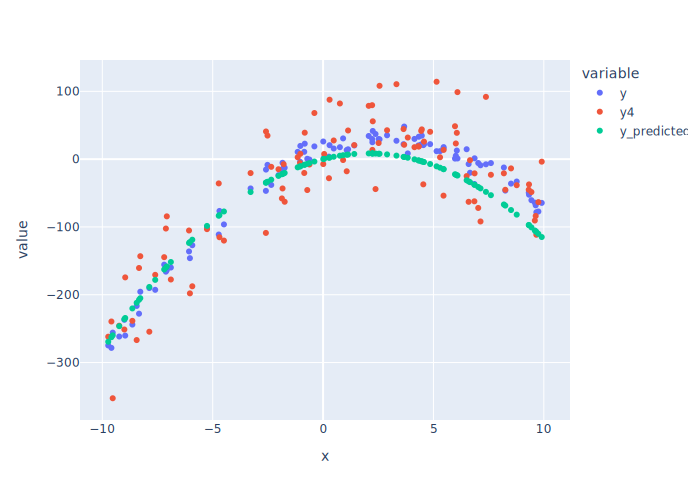

In [22]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

## Visualization: Expression Tree as a diagram

In [23]:
import geppy as gep

 # we want use symbol labels instead of words in the tree graph
rename_labels = {'add': '+', 'sub': '-', 'mul': '*', 'protected_div': '/'}  
gep.export_expression_tree(egp.best_individual, rename_labels, 'data/numerical_expression_tree.png')



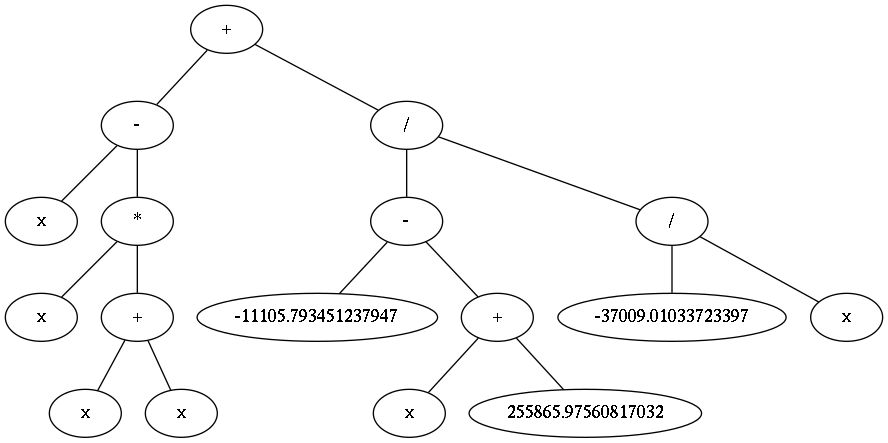

In [24]:
# show the above image here for convenience
from IPython.display import Image
Image(filename='data/numerical_expression_tree.png') 

## Train from a saved checkpoint

### As long as you have the previous SimpleGeppy object in memory
### you can start from where you stoped by calling launch_evolution again

In [25]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg        	std        	min   	max        
0  	0     	100 	9.85876e+21	9.77371e+22	253806	9.82324e+23
1  	99    	100 	5.811e+24  	5.78182e+25	253806	5.81095e+26
2  	99    	100 	9.74844e+14	8.47096e+15	221369	8.49056e+16
3  	99    	100 	7.82335e+20	7.56349e+21	220556	7.60058e+22
4  	99    	100 	8.01295e+17	7.83288e+18	220556	7.87264e+19
5  	99    	100 	3.20321e+13	1.81838e+14	220556	1.73196e+15
6  	99    	100 	5.82396e+25	5.79477e+26	220556	5.82396e+27
7  	99    	100 	3.01661e+21	3.00132e+22	220556	3.01644e+23
8  	99    	100 	2.52143e+21	2.28515e+22	220556	2.28784e+23
9  	99    	100 	1.97163e+19	1.96161e+20	220556	1.97149e+21
10 	99    	100 	8.41563e+20	6.82093e+21	220556	6.63906e+22
11 	99    	100 	8.89705e+22	8.84597e+23	220556	8.8906e+24 
12 	99    	100 	5.66959e+31	5.64117e+32	220556	5.66959e+33
13 	99    	100 	1.5501e+23 	1.46061e+24	220556	1.46643e+25
14 	99    	100 	4.75901e+22	3.24131e+23	220556	2.68304e+24
15 	99    	100 	2.94604e+23	2.05284e+24	220556	1.46643e+

### The log variable gets restarted everytime you launch evolution

In [26]:
egp.log[:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 9.85875682302771e+21,
  'std': 9.773707433705863e+22,
  'min': 253806.21730914034,
  'max': 9.82324014078625e+23},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 5.811000743914307e+24,
  'std': 5.781824991355737e+25,
  'min': 253806.21730914034,
  'max': 5.8109532371949646e+26},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 974843687741243.0,
  'std': 8470961680491095.0,
  'min': 221368.62797694953,
  'max': 8.490563835503549e+16},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 7.823348613003093e+20,
  'std': 7.563487009737774e+21,
  'min': 220556.37146516232,
  'max': 7.60057603717093e+22},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 8.012946645157147e+17,
  'std': 7.832883864891479e+18,
  'min': 220556.37146516232,
  'max': 7.872638098750387e+19}]

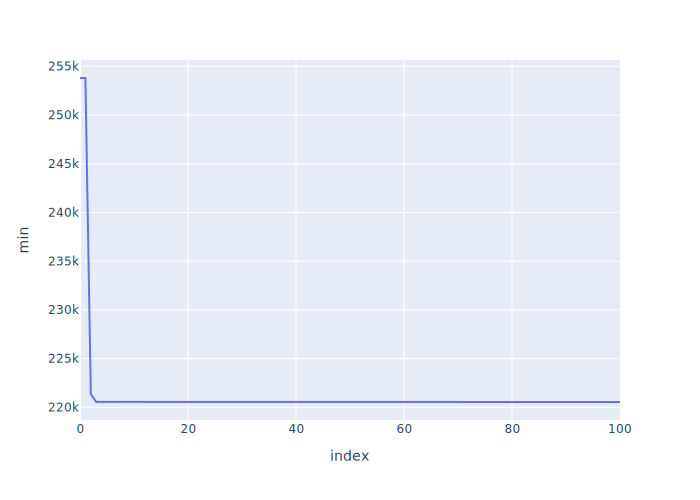

In [27]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

### But the logs variable keeps the story as a list of list for each execution

In [28]:
egp.logs[0][:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 7.294023886136472e+33,
  'std': 7.140273351907304e+34,
  'min': 851004.5814105918,
  'max': 7.17648043904657e+35},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 8.94208009582833e+23,
  'std': 8.814695939533907e+24,
  'min': 851004.5814105918,
  'max': 8.85955704600926e+25},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 1.9936230603569955e+35,
  'std': 1.983629899381243e+36,
  'min': 675496.7696517917,
  'max': 1.9936230603569745e+37},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 5.5759372504208284e+20,
  'std': 5.547987305846754e+21,
  'min': 675496.7696517917,
  'max': 5.575937043048729e+22},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 3.110718955773784e+20,
  'std': 2.89300374100069e+21,
  'min': 675496.7696517917,
  'max': 2.9021984135765337e+22}]

In [29]:
egp.logs[1][:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 9.85875682302771e+21,
  'std': 9.773707433705863e+22,
  'min': 253806.21730914034,
  'max': 9.82324014078625e+23},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 5.811000743914307e+24,
  'std': 5.781824991355737e+25,
  'min': 253806.21730914034,
  'max': 5.8109532371949646e+26},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 974843687741243.0,
  'std': 8470961680491095.0,
  'min': 221368.62797694953,
  'max': 8.490563835503549e+16},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 7.823348613003093e+20,
  'std': 7.563487009737774e+21,
  'min': 220556.37146516232,
  'max': 7.60057603717093e+22},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 8.012946645157147e+17,
  'std': 7.832883864891479e+18,
  'min': 220556.37146516232,
  'max': 7.872638098750387e+19}]

### You must clean it by using clan_logs() function

In [30]:
egp.clean_logs()
egp.logs

[]

### Get and use new results

In [31]:
best_func = egp.get_best_solution_as_function()
best_func

<function easy_geppy.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

In [32]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,-0.616244,-0.641945,4.891293,-0.923173,35.601678,-7.852117,-7.755151
1,0.266881,3.645723,4.016486,-19.657056,2.455013,-28.137008,2.887195
2,-9.528698,-255.877463,-260.504993,-270.211976,-296.209204,-352.679471,-289.762489
3,8.514385,-36.073473,-37.883496,-50.542949,-49.147798,-13.640144,-48.333719
4,-6.895328,-159.875213,-163.001587,-183.630892,-206.072787,-177.538017,-173.367264
...,...,...,...,...,...,...,...
95,-4.726079,-111.173219,-107.186589,-140.694932,-179.302547,-35.805730,-98.322351
96,-2.019787,-23.568382,-15.720208,-28.803716,5.948266,-14.906482,-31.087815
97,5.142210,11.755626,10.047070,15.008597,-7.233014,114.154525,5.490013
98,2.376611,37.066822,37.050188,33.716275,42.560975,-44.143946,15.682865


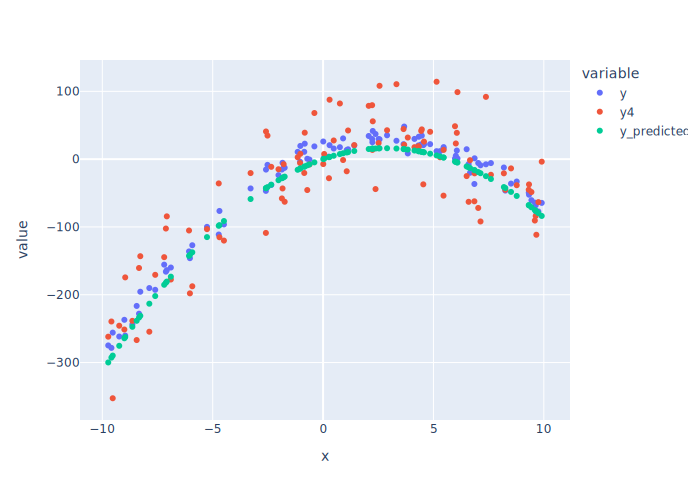

In [33]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

In [34]:
egp.get_best_solution_simplified()

x*(11.3520574473985 - 2*x)